# Week #3
## Метод опорных векторов
### Опорные объекты

Метод опорных векторов (Support Vector Machine, SVM) — один из видов линейных классификаторов. Функционал, который он оптимизирует, направлен на максимизацию ширины разделяющей полосы между классами. Из теории статистического обучения известно, что эта ширина тесно связана с обобщающей способностью алгоритма, а ее максимизация позволяет бороться с переобучением.

Метод опорных векторов имеет еще одну особенность. Если преобразовать его оптимизационную задачу, то окажется, что итоговый классификатор можно представить как взвешенную сумму скалярных произведений данного объекта на объекты обучающей выборки.

По сути, алгоритм делает предсказания на основе сходства нового объекта с объектами обучающей выборки. При этом, как правило, далеко не все коэффициенты оказываются ненулевыми. Это означает, что классификация делается на основе сходства лишь с частью обучающих объектов. Такие объекты называются опорными.

Метод опорных векторов реализован в классе sklearn.svm.SVC.

- Основными параметрами этого класса являются коэффициент С и тип ядра kernel. В данной задаче мы будем использовать линейное ядро — для этого нужно задать значение параметра kernel='linear'
- Индексы опорных объектов обученного классификатора хранятся в поле support_

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC

In [2]:
# Загрузите выборку из файла svm-data.csv. В нем записана двумерная выборка 
# (целевая переменная указана в первом столбце, признаки — во втором и третьем).
data = pd.read_csv('data/svm-data.csv', header=None)
X = data.ix[:,1:]
y = data.ix[:,0]

In [3]:
# Обучите классификатор с линейным ядром, параметром C = 100000 и random_state=241. 
# Такое значение параметра нужно использовать, чтобы убедиться, что SVM работает 
# с выборкой как с линейно разделимой. При более низких значениях параметра алгоритм 
# будет настраиваться с учетом слагаемого в функционале, штрафующего за маленькие отступы, 
# из-за чего результат может не совпасть с решением классической задачи SVM для линейно 
# разделимой выборки.
method = SVC(C=100000, kernel='linear', random_state=241).fit(X, y)

In [4]:
# Найдите номера объектов, которые являются опорными (нумерация с единицы). 
# Они будут являться ответом на задание. Обратите внимание, что в качестве ответа 
# нужно привести номера объектов в возрастающем порядке через запятую или пробел. 
# Нумерация начинается с 1.
print ' '.join(str(x+1) for x in method.support_)

4 5 10


### Анализ текстов

Метод опорных векторов (Support Vector Machine, SVM) — один из видов линейных классификаторов. Функционал, который он оптимизирует, направлен на максимизацию ширины разделяющей полосы между классами. Из теории статистического обучения известно, что эта ширина тесно связана с обобщающей способностью алгоритма, а ее максимизация позволяет бороться с переобучением.

Одна из причин популярности линейных методов заключается в том, что они хорошо работают на разреженных данных. Так называются выборки с большим количеством признаков, где на каждом объекте большинство признаков равны нулю. Разреженные данные возникают, например, при работе с текстами. Дело в том, что текст удобно кодировать с помощью "мешка слов" — формируется столько признаков, сколько всего уникальных слов встречается в текстах, и значение каждого признака равно числу вхождений в документ соответствующего слова. Ясно, что общее число различных слов в наборе текстов может достигать десятков тысяч, и при этом лишь небольшая их часть будет встречаться в одном конкретном тексте.

Можно кодировать тексты хитрее, и записывать не количество вхождений слова в текст, а TF-IDF. Это показатель, который равен произведению двух чисел: TF (term frequency) и IDF (inverse document frequency). Первая равна отношению числа вхождений слова в документ к общей длине документа. Вторая величина зависит от того, в скольки документах выборки встречается это слово. Чем больше таких документов, тем меньше IDF. Таким образом, TF-IDF будет иметь высокое значение для тех слов, которые много раз встречаются в данном документе, и редко встречаются в остальных.

Как мы уже говорили выше, линейные методы часто применяются для решения различных задач анализа текстов. В этом задании мы применим метод опорных векторов для определения того, к какой из тематик относится новость: атеизм или космос.

Для начала вам потребуется загрузить данные. В этом задании мы воспользуемся одним из датасетов, доступных в scikit-learn'е — 20 newsgroups. Для этого нужно воспользоваться модулем datasets:

from sklearn import datasets

newsgroups = datasets.fetch_20newsgroups(subset='all', categories=['alt.atheism', 'sci.space'])

После выполнения этого кода массив с текстами будет находиться в поле newsgroups.data, номер класса — в поле newsgroups.target.

Одна из сложностей работы с текстовыми данными состоит в том, что для них нужно построить числовое представление. Одним из способов нахождения такого представления является вычисление TF-IDF. В Scikit-Learn это реализовано в классе sklearn.feature_extraction.text.TfidfVectorizer. Преобразование обучающей выборки нужно делать с помощью функции fit_transform, тестовой — с помощью transform.

Реализация SVM-классификатора находится в классе sklearn.svm.SVC. Веса каждого признака у обученного классификатора хранятся в поле coef_. Чтобы понять, какому слову соответствует i-й признак, можно воспользоваться методом get_feature_names() у TfidfVectorizer:

feature_mapping = vectorizer.get_feature_names()

print feature_mapping[i]

Подбор параметров удобно делать с помощью класса sklearn.grid_search.GridSearchCV (При использовании библиотеки scikit-learn версии 18.0.1 sklearn.model_selection.GridSearchCV). Пример использования:

grid = {'C': np.power(10.0, np.arange(-5, 6))}

cv = KFold(y.size, n_folds=5, shuffle=True, random_state=241)

clf = svm.SVC(kernel='linear', random_state=241)

gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)

gs.fit(X, y)

При использовании библиотеки scikit-learn версии 18.0.1 и выше KFold задаётся немного по-другому:

cv = KFold(n_splits=5, shuffle=True, random_state=241)

Первым аргументом в GridSearchCV передается классификатор, для которого будут подбираться значения параметров, вторым — словарь (dict), задающий сетку параметров для перебора. После того, как перебор окончен, можно проанализировать значения качества для всех значений параметров и выбрать наилучший вариант:

for a in gs.grid_scores_:
    #a.mean_validation_score — оценка качества по кросс-валидации
    #a.parameters — значения параметров

In [5]:
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [6]:
# Загрузите объекты из новостного датасета 20 newsgroups, относящиеся к категориям 
# "космос" и "атеизм" (инструкция приведена выше). Обратите внимание, что загрузка данных 
# может занять несколько минут
data = datasets.fetch_20newsgroups(subset='all', categories=['alt.atheism', 'sci.space'])

In [7]:
# Вычислите TF-IDF-признаки для всех текстов. Обратите внимание, что в этом задании 
# мы предлагаем вам вычислить TF-IDF по всем данным. При таком подходе получается, 
# что признаки на обучающем множестве используют информацию из тестовой выборки — 
# но такая ситуация вполне законна, поскольку мы не используем значения целевой переменной 
# из теста. На практике нередко встречаются ситуации, когда признаки объектов тестовой выборки 
# известны на момент обучения, и поэтому можно ими пользоваться при обучении алгоритма.
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data.data)
y = data.target
all_words = tfidf_vectorizer.get_feature_names()
print 'Words: {}'.format(len(all_words))
print all_words[10000:10050]

Words: 28382
[u'do', u'do1', u'doable', u'dobbs', u'dobyns', u'doc', u'dock', u'docked', u'docking', u'docs', u'doctor', u'doctoral', u'doctors', u'doctrinaire', u'doctrinal', u'doctrine', u'doctrines', u'document', u'documentary', u'documentation', u'documented', u'documents', u'dod', u'dodge', u'doe', u'doees', u'doen', u'does', u'doesn', u'dof', u'dog', u'dogma', u'dogmas', u'dogmatic', u'dogs', u'doi', u'doing', u'doings', u'doink', u'dokas', u'dolan', u'dole', u'dollar', u'dollars', u'dolphin', u'dolphins', u'domain', u'domains', u'domestic', u'domesticated']


In [8]:
# Подберите минимальный лучший параметр C из множества [10^-5, 10^-4, ... 10^4, 10^5] 
# для SVM с линейным ядром (kernel='linear') при помощи кросс-валидации по 5 блокам. 
# Укажите параметр random_state=241 и для SVM, и для KFold. В качестве меры качества 
# используйте долю верных ответов (accuracy).
cv = KFold(n_splits=5, shuffle=True, random_state=241)
grid = {'C': np.power(10.0, np.arange(-5, 6))}
method = SVC(kernel='linear', random_state=241)
gs = GridSearchCV(method, grid, scoring='accuracy', cv=cv)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03,   1.00000e+04,   1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [9]:
# Обучите SVM по всей выборке с оптимальным параметром C, найденным на предыдущем шаге.
best_method = gs.best_estimator_
best_method.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
# Найдите 10 слов с наибольшим абсолютным значением веса (веса хранятся в поле 
# coef_ у svm.SVC). Они являются ответом на это задание. Укажите эти слова через запятую 
# или пробел, в нижнем регистре, в лексикографическом порядке.
num = 10
weights = best_method.coef_.A.squeeze()
print 'Weights: {}'.format(weights.shape)
print weights
indices = np.argsort(np.abs(weights))[-num:] #[::-1] to reverse
print 'Indices of words with max abs weights: {}'.format(indices.shape)
print indices
words = np.array(all_words)[indices]
print '{} most crucial words:'.format(num)
print ' '.join(w for w in sorted(words))

Weights: (28382,)
[ 0.29258057 -0.12314757  0.         ...,  0.01972862  0.05831336
 -0.00297347]
Indices of words with max abs weights: (10,)
[22936 15606  5776 21850 23673 17802  5093  5088 12871 24019]
10 most crucial words:
atheism atheists bible god keith moon religion sci sky space


## Логистическая регрессия
### Логистическая регрессия

Логистическая регрессия — один из видов линейных классификаторов. Одной из ее особенностей является возможность оценивания вероятностей классов, тогда как большинство линейных классификаторов могут выдавать только номера классов.

Логистическая регрессия использует достаточно сложный функционал качества, который не допускает записи решения в явном виде (в отличие от, например, линейной регрессии). Тем не менее, логистическую регрессию можно настраивать с помощью градиентного спуска.

Мы будем работать с выборкой, содержащей два признака. Будем считать, что ответы лежат в множестве {-1, 1}. Для настройки логистической регрессии мы будем решать следующую задачу:

Здесь xi1 и xi2 — значение первого и второго признаков соответственно на объекте xi. В этом задании мы будем рассматривать алгоритмы без свободного члена, чтобы упростить работу.

Градиентный шаг для весов будет заключаться в одновременном обновлении весов w1 и w2 по следующим формулам (проверьте сами, что здесь действительно выписана производная нашего функционала):

Линейные методы могут переобучаться и давать плохое качество из-за различных проблем в данных: мультиколлинеарности, зашумленности и т.д. Чтобы избежать этого, следует использовать регуляризацию — она позволяет понизить сложность модели и не допустить переобучения. Сила регуляризации определяется коэффициентом C в формулах, указанных выше.

В этом задании мы предлагаем вам самостоятельно реализовать градиентный спуск.

В качестве метрики качества будем использовать AUC-ROC (Area Under ROC-Curve). Она предназначена для алгоритмов бинарной классификации, выдающих оценку принадлежности объекта к одному из классов. По сути, значение этой метрики является агрегацией показателей качества всех алгоритмов, которые можно получить, выбирая какой-либо порог для оценки принадлежности.

В Scikit-Learn метрика AUC реализована функцией sklearn.metrics.roc_auc_score. В качестве первого аргумента ей передается вектор истинных ответов, в качестве второго — вектор с оценками принадлежности объектов к первому классу.

In [37]:
from sklearn.metrics import *
import math

In [38]:
# Загрузите данные из файла data-logistic.csv. Это двумерная выборка, 
# целевая переменная на которой принимает значения -1 или 1.
data = pd.read_csv('data/data-logistic.csv', header=None)
X = data.ix[:,1:].get_values()
y = data.ix[:,0]

In [39]:
# Убедитесь, что выше выписаны правильные формулы для градиентного спуска. 
# Обратите внимание, что мы используем полноценный градиентный спуск, а не его 
# стохастический вариант!

In [40]:
# Реализуйте градиентный спуск для обычной и L2-регуляризованной (с коэффициентом 
# регуляризации 10) логистической регрессии. Используйте длину шага k=0.1. 
# В качестве начального приближения используйте вектор (0, 0).

def gradient_descent_step(X, y, C, k, w):
    L = X.shape[0]
    M = X.shape[1]
    assert(len(w) == M)
    assert(y.shape[0] == L)

    dot_product = [ np.dot(w, X[i,:]) for i in range(L) ]

    w_new = np.array([ 
        w[j] 
        + k / L * np.sum(
            [ y[i] * X[i,j] * (1 - 1 / (1 + math.exp(-y[i] * dot_product[i]))) for i in range(L) ]
        )
        - k * C * w[j] 
        for j in range(M) 
    ])
    
    return w_new


def gradient_descent(X, y, C, k, N, w):
    w_old = w
    for i in range(0, N):
        w_new = gradient_descent_step(X=X, y=y, C=C, k=k, w=w_old)
        dist = np.linalg.norm(w_old - w_new)
        
        print 'Iteration #{}: w = {} distance={}'.format(i, w_new, dist)
        
        if dist < 1e-5:
            return w_new

        w_old = w_new
    
    print 'Max number of iterations ({}) is reached'.format(N)
    
    return w_old


In [41]:
# Запустите градиентный спуск и доведите до сходимости (евклидово расстояние между 
# векторами весов на соседних итерациях должно быть не больше 1e-5). Рекомендуется 
# ограничить сверху число итераций десятью тысячами.
C = 10
k = 0.1
w1 = 0
w2 = 0
N = 10000
w = np.array([0, 0])
print 'With regulation:'
w_opt_regul = gradient_descent(X=X, y=y, C=C, k=k, N=N, w=w)
print 'Without regulation:'
w_opt_noregul = gradient_descent(X=X, y=y, C=0, k=k, N=N, w=w)

With regulation:
Iteration #0: w = [ 0.03573127  0.03245997] distance=0.0482739384539
Iteration #1: w = [ 0.02669911  0.02275351] distance=0.0132587803327
Iteration #2: w = [ 0.02905739  0.02532643] distance=0.00349018975742
Iteration #3: w = [ 0.02842657  0.02463533] distance=0.000935717143569
Iteration #4: w = [ 0.02859494  0.02481978] distance=0.00024974376394
Iteration #5: w = [ 0.02854995  0.02477049] distance=6.67386427032e-05
Iteration #6: w = [ 0.02856197  0.02478366] distance=1.78286589294e-05
Iteration #7: w = [ 0.02855875  0.02478014] distance=4.76318913958e-06
Without regulation:
Iteration #0: w = [ 0.03573127  0.03245997] distance=0.0482739384539
Iteration #1: w = [ 0.06243037  0.05521348] distance=0.0350794046557
Iteration #2: w = [ 0.08343428  0.07202494] distance=0.026903330054
Iteration #3: w = [ 0.10067273  0.08502955] distance=0.0215936087286
Iteration #4: w = [ 0.11522227  0.0953854 ] distance=0.0178586914115
Iteration #5: w = [ 0.1277369   0.10377852] distance=0.01

In [42]:
# Какое значение принимает AUC-ROC на обучении без регуляризации и при ее использовании? 
# Эти величины будут ответом на задание. В качестве ответа приведите два числа через пробел. 
# Обратите внимание, что на вход функции roc_auc_score нужно подавать оценки вероятностей, 
# подсчитанные обученным алгоритмом. Для этого воспользуйтесь сигмоидной функцией: 
# a(x) = 1 / (1 + exp(-w1 x1 - w2 x2)).
def get_auc_score(X, y_true, w):
    L = X.shape[0]
    y_predict = np.array([ 1 / (1 + math.exp(-np.dot(w, X[i,:]))) for i in range(L) ])
    return roc_auc_score(y_true, y_predict)

print 'AUC-ROC:'
print '{} {}'.format(get_auc_score(X, y, w_opt_noregul), get_auc_score(X, y, w_opt_regul))

AUC-ROC:
0.926857142857 0.936285714286


In [43]:
# Попробуйте поменять длину шага. Будет ли сходиться алгоритм, если делать более длинные шаги? 
# Как меняется число итераций при уменьшении длины шага?
# w_opt1 = gradient_descent(X=X, y=y, C=C, k=0.2, N=N, w=w) # расходится при k>0.1
# w_opt1 = gradient_descent(X=X, y=y, C=C, k=0.03, N=N, w=w) # дольше сходится при k<0.1

In [44]:
# Попробуйте менять начальное приближение. Влияет ли оно на что-нибудь?
# w_opt1 = gradient_descent(X=X, y=y, C=C, k=0.1, N=N, w=np.array([10, 10])) # не влияет

## Метрики качества
### Метрики качества классификации

В задачах классификации может быть много особенностей, влияющих на подсчет качества: различные цены ошибок, несбалансированность классов и т.д. Из-за этого существует большое количество метрик качества — каждая из них рассчитана на определенное сочетание свойств задачи и требований к ее решению.

Меры качества классификации можно разбить на две большие группы: предназначенные для алгоритмов, выдающих номера классов, и для алгоритмов, выдающих оценки принадлежности к классам. К первой группе относятся доля правильных ответов, точность, полнота, F-мера. Ко второй — площади под ROC- или PR-кривой.

Различные метрики качества реализованы в пакете sklearn.metrics. Конкретные функции указаны в инструкции по выполнению задания.

In [45]:
# Загрузите файл classification.csv. В нем записаны истинные классы объектов выборки 
# (колонка true) и ответы некоторого классификатора (колонка pred).
data = pd.read_csv('data/classification.csv')
data.head(5)

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1


In [46]:
# Заполните таблицу ошибок классификации:
# Для этого подсчитайте величины TP, FP, FN и TN согласно их определениям. 
# Например, FP — это количество объектов, имеющих класс 0, но отнесенных алгоритмом к классу 1. 
# Ответ в данном вопросе — четыре числа через пробел.
TP = np.where(data.true + data.pred == 2)[0].size
FP = np.nonzero(data.pred - data.true == 1)[0].size
FN = np.nonzero(data.true - data.pred == 1)[0].size
TN = np.nonzero(data.true + data.pred == 0)[0].size
print '{} {} {} {}'.format(TP, FP, FN, TN)

43 34 59 64


In [54]:
# Посчитайте основные метрики качества классификатора:
# - Accuracy (доля верно угаданных) — sklearn.metrics.accuracy_score
# - Precision (точность) — sklearn.metrics.precision_score
# - Recall (полнота) — sklearn.metrics.recall_score
# - F-мера — sklearn.metrics.f1_score
# В качестве ответа укажите эти четыре числа через пробел.
accuracy = accuracy_score(data.true, data.pred)
precision = precision_score(data.true, data.pred)
recall = recall_score(data.true, data.pred)
f1 = f1_score(data.true, data.pred)
print '{} {} {} {}'.format(accuracy, precision, recall, f1)

0.535 0.558441558442 0.421568627451 0.480446927374


In [159]:
# Имеется четыре обученных классификатора. В файле scores.csv записаны истинные классы и 
# значения степени принадлежности положительному классу для каждого классификатора на 
# некоторой выборке:
# - для логистической регрессии — вероятность положительного класса (колонка score_logreg),
# - для SVM — отступ от разделяющей поверхности (колонка score_svm),
# - для метрического алгоритма — взвешенная сумма классов соседей (колонка score_knn),
# - для решающего дерева — доля положительных объектов в листе (колонка score_tree).
# Загрузите этот файл.
data = pd.read_csv('data/scores.csv')
data.head(5)
columns = data.columns.get_values()

In [160]:
# Посчитайте площадь под ROC-кривой для каждого классификатора. 
# Какой классификатор имеет наибольшее значение метрики AUC-ROC (укажите название столбца)? 
# Воспользуйтесь функцией sklearn.metrics.roc_auc_score.
roc_aucs = np.array([ roc_auc_score(data.true, data.ix[:,i]) for i in range(1, data.shape[1]) ])
scores = np.vstack((columns[1:], roc_aucs)).transpose()
print scores[np.argmax(scores[:,1]),:]

['score_logreg' 0.719187675070028]


In [209]:
# Какой классификатор достигает наибольшей точности (Precision) при полноте (Recall) 
# не менее 70% ?
# Чтобы получить ответ на этот вопрос, найдите все точки precision-recall-кривой 
# с помощью функции sklearn.metrics.precision_recall_curve. Она возвращает три массива: 
# precision, recall, thresholds. В них записаны точность и полнота при определенных порогах, 
# указанных в массиве thresholds. Найдите максимальной значение точности среди тех записей, 
# для которых полнота не меньше, чем 0.7.
print 'Max precision for >=70% recall:'
for i in range(1, data.shape[1]):
    p, r, t = precision_recall_curve(data.true, data.ix[:,i])
    p1 = np.max(p[np.where(r >= 0.7)])
    print columns[i], p1

Max precision for >=70% recall:
score_logreg 0.63025210084
score_svm 0.622807017544
score_knn 0.606557377049
score_tree 0.651785714286


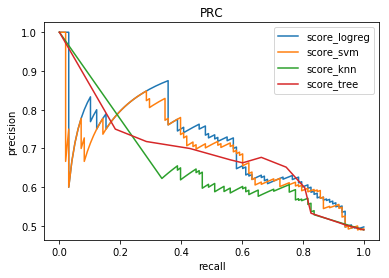

In [210]:
from matplotlib import pyplot as plt

plt.close()

for i in range(1, data.shape[1]):
    p, r, _ = precision_recall_curve(data.true, data.ix[:,i])
    plt.plot(r, p, label=columns[i])

plt.title('PRC')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()
plt.show()